# 1. Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 2. Load Dataset

In [20]:
# Load the dataset
df = pd.read_csv("Customer_data.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   object 
 1   first_name      1000 non-null   object 
 2   last_name       1000 non-null   object 
 3   Age             1000 non-null   int64  
 4   gender          1000 non-null   object 
 5   Annual_income   1000 non-null   object 
 6   spending_score  1000 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


In [22]:
df.head()

,customer_id,first_name,last_name,Age,gender,Annual_income,spending_score
0,01JMRS0NAKT4JBZ7P79H5C3G1N,Flore,Bondesen,29,Female,$78130.22,3.95
1,01JMRS0NAMGY6QSFT4B192F3F2,Martina,Sweet,36,Female,$91532.64,1.51
2,01JMRS0NANQ7CZGQMDG1YF1C0G,Aggi,Jellett,18,Female,$83951.49,8.02
3,01JMRS0NAN9V8TH1SECREJP186,Royal,Lundy,35,Male,$35345.78,6.41
4,01JMRS0NAPZ8P6TZ4XK49XBT3M,Penny,Arbuckle,27,Female,$88320.98,9.94


In [24]:
df['Annual_income'] = df['Annual_income'].str.replace('$', '', regex=False).astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   object 
 1   first_name      1000 non-null   object 
 2   last_name       1000 non-null   object 
 3   Age             1000 non-null   int64  
 4   gender          1000 non-null   object 
 5   Annual_income   1000 non-null   float64
 6   spending_score  1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [26]:
df.head()

,customer_id,first_name,last_name,Age,gender,Annual_income,spending_score
0,01JMRS0NAKT4JBZ7P79H5C3G1N,Flore,Bondesen,29,Female,78130.22,3.95
1,01JMRS0NAMGY6QSFT4B192F3F2,Martina,Sweet,36,Female,91532.64,1.51
2,01JMRS0NANQ7CZGQMDG1YF1C0G,Aggi,Jellett,18,Female,83951.49,8.02
3,01JMRS0NAN9V8TH1SECREJP186,Royal,Lundy,35,Male,35345.78,6.41
4,01JMRS0NAPZ8P6TZ4XK49XBT3M,Penny,Arbuckle,27,Female,88320.98,9.94


In [28]:
df.shape

(1000, 7)

In [32]:
# Check for missing values
df.isnull().sum()

customer_id       0
first_name        0
last_name         0
Age               0
gender            0
Annual_income     0
spending_score    0
dtype: int64

In [33]:
# Check for duplicates
df.duplicated().sum()

0

# 3. Data Preprocessing

In [34]:
from sklearn.preprocessing import StandardScaler
df.columns = df.columns.str.strip()

# Selecting numerical features (excluding Customer ID)
features = ['Age', 'Annual_income', 'spending_score']
df_selected = df[features].copy()

#Convert to numeric,handle NaNs
df_selected = df_selected.apply(pd.to_numeric,errors='coerce').dropna()

#Ensure data exists
if df_selected.shape[0] == 0:
    raise ValueError("No valid numerical data found for scaling.")

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)
print("Standardization complete!")

Standardization complete!


# 4. Determine Optimal Clusters

### 4.1 Elbow Method

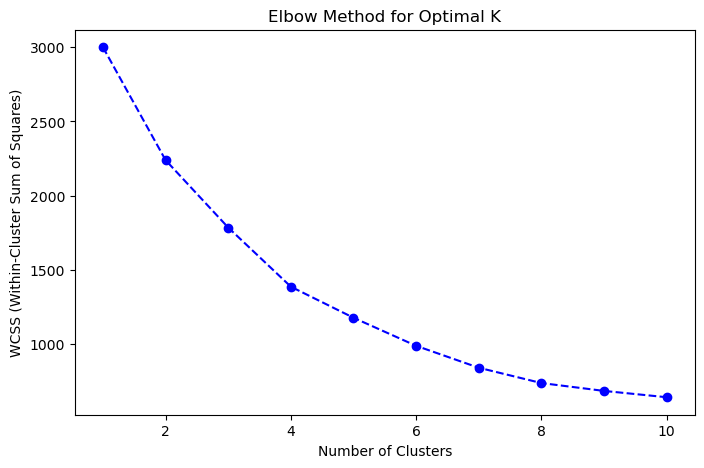

In [35]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

### 4.2 Silhouette Score

In [36]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil_score = silhouette_score(df_scaled, labels)
    print(f"Silhouette Score for {k} clusters: {sil_score}")

Silhouette Score for 2 clusters: 0.24568210773516744
Silhouette Score for 3 clusters: 0.23868231209274934
Silhouette Score for 4 clusters: 0.27838002925343197
Silhouette Score for 5 clusters: 0.26753370740715365
Silhouette Score for 6 clusters: 0.2843428619936077
Silhouette Score for 7 clusters: 0.2903619469469156
Silhouette Score for 8 clusters: 0.28797671967903965
Silhouette Score for 9 clusters: 0.28561250674021155
Silhouette Score for 10 clusters: 0.2800119341384476


# 5.  Apply K-Means Clustering

In [37]:
# Set the optimal number of clusters (e.g., 5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)

# Fit model and assign cluster labels
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display first few rows with cluster labels
print(df.head())

                  customer_id first_name last_name  Age  gender  \
0  01JMRS0NAKT4JBZ7P79H5C3G1N      Flore  Bondesen   29  Female   
1  01JMRS0NAMGY6QSFT4B192F3F2    Martina     Sweet   36  Female   
2  01JMRS0NANQ7CZGQMDG1YF1C0G       Aggi   Jellett   18  Female   
3  01JMRS0NAN9V8TH1SECREJP186      Royal     Lundy   35    Male   
4  01JMRS0NAPZ8P6TZ4XK49XBT3M      Penny  Arbuckle   27  Female   

   Annual_income  spending_score  Cluster  
0       78130.22            3.95        0  
1       91532.64            1.51        0  
2       83951.49            8.02        3  
3       35345.78            6.41        1  
4       88320.98            9.94        3  


# 6. Visualization

### 6.1 2D Scatter Plot using PCA

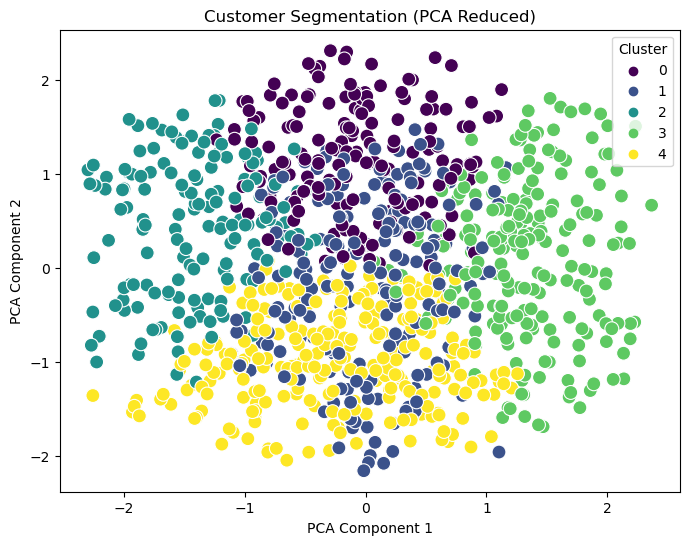

In [38]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation (PCA Reduced)')
plt.legend(title='Cluster')
plt.show()

###  6.2 Pair Plot

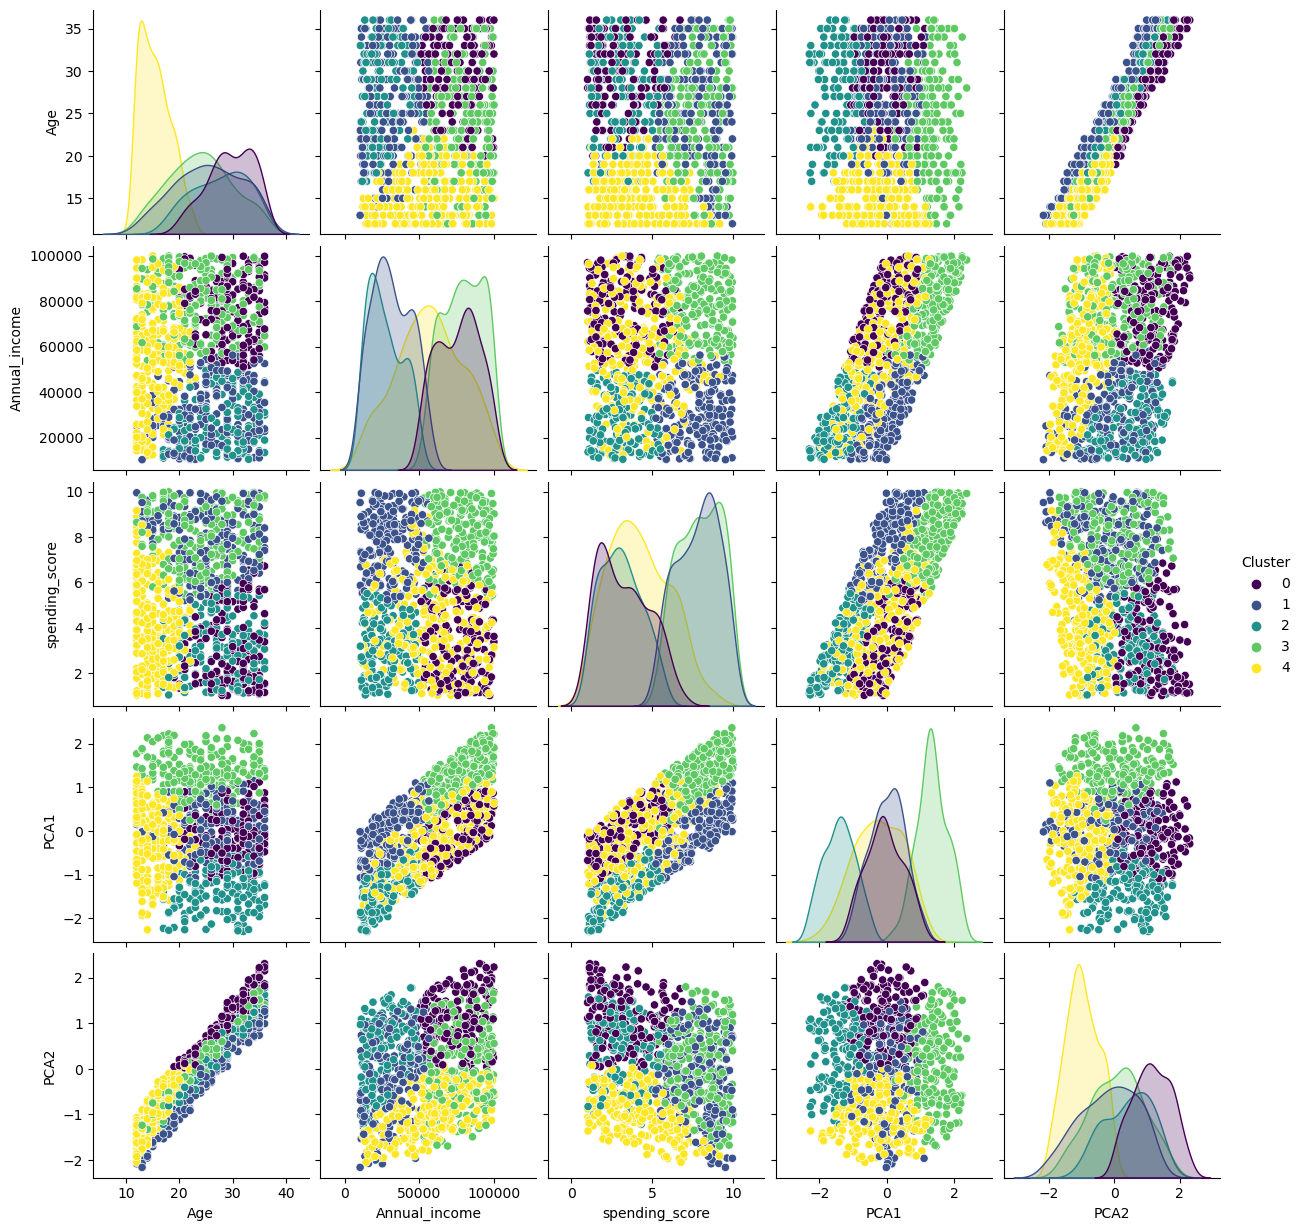

In [39]:
sns.pairplot(df, hue="Cluster", palette="viridis")
plt.show()

### 6.3 Display Cluster Centroids 

In [40]:
# Reverse transform centroids to original scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centroids (Original Scale):\n", pd.DataFrame(centroids, columns=features))

Cluster Centroids (Original Scale):
          Age  Annual_income  spending_score
0  29.529070   75679.700291        3.256686
1  25.454106   31486.346135        7.805121
2  27.614379   27115.965686        3.080523
3  23.972093   78997.659256        7.942093
4  15.470356   56508.500909        4.184506


In [41]:
df.head()

,customer_id,first_name,last_name,Age,gender,Annual_income,spending_score,Cluster,PCA1,PCA2
0,01JMRS0NAKT4JBZ7P79H5C3G1N,Flore,Bondesen,29,Female,78130.22,3.95,0,0.191241,1.049755
1,01JMRS0NAMGY6QSFT4B192F3F2,Martina,Sweet,36,Female,91532.64,1.51,0,-0.156927,2.294930
2,01JMRS0NANQ7CZGQMDG1YF1C0G,Aggi,Jellett,18,Female,83951.49,8.02,3,1.525961,-0.660331
3,01JMRS0NAN9V8TH1SECREJP186,Royal,Lundy,35,Male,35345.78,6.41,1,-0.322774,1.241290
4,01JMRS0NAPZ8P6TZ4XK49XBT3M,Penny,Arbuckle,27,Female,88320.98,9.94,3,2.114955,0.434028


In [42]:
grouped_count = df.groupby('Cluster').size().reset_index(name='Count')
print(grouped_count)

   Cluster  Count
0        0    172
1        1    207
2        2    153
3        3    215
4        4    253


### Based on the clustering results, here’s a comprehensive conclusion:

### Overview of Cluster Distribution
- **Clusters Identified:** The model segmented the data into **five distinct clusters**.
- **Cluster Sizes:** 
  - Cluster 0: 172 observations
  - Cluster 1: 207 observations
  - Cluster 2: 153 observations
  - Cluster 3: 215 observations
  - Cluster 4: 253 observations

### Key Insights
- **Moderate Balance:** Although the clusters are relatively balanced—with counts ranging from 153 to 253—the slight differences in size may indicate nuanced underlying patterns in the data.
- **Largest vs. Smallest Segments:** 
  - **Cluster 4** is the largest group, suggesting it might represent the most common or dominant segment in the dataset.
  - **Cluster 2** is the smallest group, which could indicate a niche or less frequent segment.

### Implications for the ML Model
- **Effective Segmentation:** The model appears to have effectively segmented the data into meaningful clusters. The variation in counts supports the idea that the data naturally groups into distinct segments.
- **Potential for Deeper Analysis:** 
  - **Characterizing Clusters:** Further analysis into the characteristics (e.g., feature distributions, centroids) of each cluster can help identify what differentiates them.
  - **Model Validation:** Employing metrics such as silhouette scores or within-cluster variance could validate the quality and cohesiveness of the clusters.
- **Strategic Applications:** These distinct segments can be leveraged in downstream tasks (e.g., targeted marketing, personalized recommendations, resource allocation) to tailor strategies for each group effectively.

### Conclusion
The in-depth analysis of the clustering outcome indicates that the ML model has successfully uncovered natural groupings within the dataset. While the clusters are fairly balanced, the observed variations in cluster sizes suggest that there are meaningful differences in the underlying data. Further exploration into each cluster's characteristics will provide greater insights into the drivers behind these groupings and enhance the interpretability and application of the clustering results.